In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/chicago_cta_crime_data.csv")
df.head()

arrest  beat                     block case_number  community_area  \
0   False  1213       008XX N ASHLAND AVE    HZ129414            24.0   
1   False   411  079XX S STONY ISLAND AVE    HZ129292            45.0   
2   False   912        035XX S LEAVITT ST    HZ129654            59.0   
3   False  1034         016XX W CERMAK RD    HZ129915            31.0   
4   False   122           001XX W LAKE ST    HZ130075            32.0   

                  date                  description  district  domestic  \
0  2016-01-26T13:10:00                       SIMPLE        12     False   
1  2016-01-26T09:07:00               ARMED: HANDGUN         4     False   
2  2016-01-26T16:00:00  TO CITY OF CHICAGO PROPERTY         9     False   
3  2016-01-26T18:45:00  PRO EMP HANDS NO/MIN INJURY        10     False   
4  2016-01-26T20:30:00               POCKET-PICKING         1     False   

  fbi_code  ...    latitude  \
0      08B  ...   41.896285   
1       03  ...   41.751270   
2       14  ...   41.829547   
3      08B  ...   41.852318   
4       06  ...   41.885741   

                                            location  location_description  \
0  {'latitude': '41.896285', 'human_address': '{"...               CTA BUS   
1  {'latitude': '41.751270452', 'human_address': ...          CTA BUS STOP   
2  {'latitude': '41.829547168', 'human_address': ...             CTA TRAIN   
3  {'latitude': '41.852318341', 'human_address': ...               CTA BUS   
4  {'latitude': '41.885741029', 'human_address': ...             CTA TRAIN   

   longitude     primary_type           updated_on  ward x_coordinate  \
0 -87.667298          BATTERY  2018-02-10T15:50:01   1.0    1165581.0   
1 -87.585822          ROBBERY  2018-02-10T15:50:01   8.0    1188223.0   
2 -87.680143  CRIMINAL DAMAGE  2018-02-10T15:50:01  11.0    1162269.0   
3 -87.666642          BATTERY  2018-02-10T15:50:01  25.0    1165884.0   
4 -87.631712            THEFT  2018-02-10T15:50:01  42.0    1175301.0   

   y_coordinate  year  
0     1905500.0  2016  
1     1852840.0  2016  
2     1881154.0  2016  
3     1889480.0  2016  
4     1901735.0  2016  

[5 rows x 22 columns]

In [17]:
df.groupby(["primary_type", "description"]).count().sort_values("arrest", ascending=False)

arrest  \
primary_type               description                                              
DECEPTIVE PRACTICE         THEFT OF LABOR/SERVICES                          15098   
THEFT                      $500 AND UNDER                                   12281   
                           POCKET-PICKING                                   11777   
BATTERY                    SIMPLE                                           10508   
ROBBERY                    STRONGARM - NO WEAPON                             5114   
THEFT                      OVER $500                                         4775   
NARCOTICS                  POSS: CANNABIS 30GMS OR LESS                      4457   
ASSAULT                    SIMPLE                                            3229   
CRIMINAL DAMAGE            CRIMINAL DEFACEMENT                               3063   
CRIMINAL TRESPASS          TO LAND                                           3013   
CRIMINAL DAMAGE            TO PROPERTY                                       2057   
                           TO CITY OF CHICAGO PROPERTY                       1874   
                           TO VEHICLE                                        1698   
THEFT                      PURSE-SNATCHING                                   1673   
ROBBERY                    ARMED: HANDGUN                                    1460   
CRIMINAL TRESPASS          TO STATE SUP LAND                                 1305   
DECEPTIVE PRACTICE         CREDIT CARD FRAUD                                 1247   
BATTERY                    DOMESTIC BATTERY SIMPLE                           1220   
NARCOTICS                  POSS: HEROIN(WHITE)                               1169   
BATTERY                    PRO EMP HANDS NO/MIN INJURY                        935   
ASSAULT                    PRO EMP HANDS NO/MIN INJURY                        927   
NARCOTICS                  POSS: CRACK                                        824   
BATTERY                    AGGRAVATED: OTHER DANG WEAPON                      790   
ROBBERY                    ATTEMPT: STRONGARM-NO WEAPON                       584   
SEX OFFENSE                PUBLIC INDECENCY                                   569   
ROBBERY                    AGGRAVATED                                         528   
PUBLIC PEACE VIOLATION     RECKLESS CONDUCT                                   522   
ROBBERY                    ARMED:KNIFE/CUTTING INSTRUMENT                     454   
DECEPTIVE PRACTICE         THEFT OF LOST/MISLAID PROP                         439   
ASSAULT                    AGGRAVATED:KNIFE/CUTTING INSTR                     392   
...                                                                           ...   
BATTERY                    AGG PRO.EMP: OTHER FIREARM                           1   
ASSAULT                    AGGRAVATED PO: OTHER FIREARM                         1   
ARSON                      POS: EXPLOSIVE/INCENDIARY DEV                        1   
                           POS: CHEMICAL/DRY-ICE DEVICE                         1   
STALKING                   CYBERSTALKING                                        1   
PROSTITUTION               PIMPING                                              1   
INTIMIDATION               EXTORTION                                            1   
KIDNAPPING                 FORCIBLE DETENTION                                   1   
OTHER OFFENSE              VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS       1   
PROSTITUTION               SOLICIT OFF PUBLIC WAY                               1   
OTHER OFFENSE              VIOLENT OFFENDER: DUTY TO REGISTER                   1   
PUBLIC PEACE VIOLATION     ARMED VIOLENCE                                       1   
                           FALSE FIRE ALARM                                     1   
OTHER OFFENSE              ARSONIST: DUTY TO REGISTER                           1   
                           ANIMAL ABUSE/NEGLECT                                 

In [40]:
df.loc[~df.primary_type.isin(["DECEPTIVE PRACTICE", "NARCOTICS"])]

arrest  beat                         block case_number  \
0        False  1213           008XX N ASHLAND AVE    HZ129414   
1        False   411      079XX S STONY ISLAND AVE    HZ129292   
2        False   912            035XX S LEAVITT ST    HZ129654   
3        False  1034             016XX W CERMAK RD    HZ129915   
4        False   122               001XX W LAKE ST    HZ130075   
6        False  1413           024XX N KIMBALL AVE    HZ130380   
7        False  1821              012XX N CLARK ST    HZ132929   
8        False  1921           039XX N WESTERN AVE    HZ135389   
9        False   623         078XX S VINCENNES AVE    HY189719   
10       False   524            119XX S HALSTED ST    HY190087   
11       False  2515             052XX W GRAND AVE    HY190274   
12       False   932           051XX S ASHLAND AVE    HY190243   
13        True   111              001XX N STATE ST    HY191106   
14       False   412               019XX E 87TH ST    HY191110   
15       False   533           131XX S LANGLEY AVE    HY190917   
17       False  1112           038XX W CHICAGO AVE    HY191301   
19       False   511              098XX S STATE ST    HY191707   
20       False  2422            075XX N PAULINA ST    HY191645   
21       False   215              043XX S STATE ST    HY191620   
22       False   112         0000X W WASHINGTON ST    HY192108   
23       False   123          0000X E ROOSEVELT RD    HY190925   
25       False  1114               040XX W LAKE ST    HY192336   
26       False  1423           012XX N WESTERN AVE    HY192302   
27        True  1231             018XX W OGDEN AVE    HY192532   
28       False   623               0000X W 79TH ST    HY192777   
29       False  1931         020XX W DIVERSEY PKWY    HY192778   
30       False   725               015XX W 63RD ST    HY193134   
31       False  1132         040XX W CONGRESS PKWY    HY193156   
33       False   731               0000X W 69TH ST    HY193470   
34        True  2422             016XX W HOWARD ST    HY193540   
...        ...   ...                           ...         ...   
102476   False   111           001XX N DEARBORN ST    JB553550   
102477   False  1812         009XX W FULLERTON AVE    JB553508   
102478   False  1012           020XX S KOSTNER AVE    JB553399   
102479   False   113              002XX S STATE ST    JB553418   
102480   False  1424         012XX N MILWAUKEE AVE    JB553490   
102481   False   122               001XX W LAKE ST    JB553546   
102482   False  1934         031XX N LAKE SHORE DR    JB553440   
102483   False   113           003XX S DEARBORN ST    JB553437   
102484   False  1135           009XX S WESTERN AVE    JB553302   
102485   False  1612            055XX N HARLEM AVE    JB553677   
102486    True   122           002XX N LA SALLE ST    JB553776   
102487   False  1614        058XX N CUMBERLAND AVE    JB553727   
102488   False  1215           003XX N ASHLAND AVE    JB553885   
102489   False   122         001XX W CONGRESS PKWY    JB554280   
102490   False   123              006XX S STATE ST    JB556173   
102491   False   122              002XX N CLARK ST    JB559627   
102492   False  1623            055XX W WILSON AVE    JB561485   
102494   False  1834              005XX N STATE ST    JB553909   
102495   False   913            025XX S ARCHER AVE    JB553922   
102496   False  1424             015XX N DAMEN AVE    JB554025   
102497   False   225         002XX W GARFIELD BLVD    JB554063   
102498   False  1424             015XX N DAMEN AVE    JB554591   
102499   False  1224               016XX W LAKE ST    JB554805   
102500   False   112              0000X N STATE ST    JB554860   
102501   False   112           0000X N DEARBORN ST    JB554923   
102503    True   624               008XX E 79TH ST    JB554890   
102504   False  1821           015XX N SEDGWICK ST    JB554927   
102505   False   511              098XX S STATE ST    JB555041   
102506   False  1831  002XX W MERCHANDISE MART P

In [241]:
selected_crimes = [
        'CTA TRAIN', 
        'CTA STATION', 
        'CTA TRACKS - RIGHT OF WAY',
        'CTA PLATFORM',
        'CTA "L" PLATFORM',
        'CTA "L" TRAIN',
        'CTA PROPERTY'
    ]

train_crimes = df.loc[df.location_description.isin(selected_crimes)]

remapping = {
    'CTA "L" PLATFORM': 'CTA PLATFORM',
    'CTA "L" TRAIN': 'CTA TRAIN',
}
train_crimes.location_description = train_crimes.location_description.replace(to_replace=remapping)
train_crimes.location_description.value_counts()

/Users/danielturcza/anaconda/envs/PythonData/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


CTA PLATFORM                 36380
CTA TRAIN                    24226
CTA STATION                   4008
CTA TRACKS - RIGHT OF WAY      112
CTA PROPERTY                     4
Name: location_description, dtype: int64

In [48]:
crimes = df.loc[~df.primary_type.isin(["DECEPTIVE PRACTICE", "NARCOTICS"])]
crimes.groupby("primary_type").count().sort_values("arrest", ascending=False)

arrest   beat  block  case_number  \
primary_type                                                           
THEFT                               31213  31213  31213        31213   
BATTERY                             14743  14743  14743        14743   
CRIMINAL DAMAGE                      9061   9061   9061         9061   
ROBBERY                              8666   8666   8666         8666   
ASSAULT                              5255   5255   5255         5255   
CRIMINAL TRESPASS                    4410   4410   4410         4410   
SEX OFFENSE                           991    991    991          991   
PUBLIC PEACE VIOLATION                748    748    748          748   
OTHER OFFENSE                         645    645    645          645   
WEAPONS VIOLATION                     463    463    463          463   
MOTOR VEHICLE THEFT                   251    251    251          251   
INTERFERENCE WITH PUBLIC OFFICER      221    221    221          221   
LIQUOR LAW VIOLATION                  209    209    209          209   
CRIM SEXUAL ASSAULT                   101    101    101          101   
BURGLARY                               88     88     88           88   
GAMBLING                               73     73     73           73   
OFFENSE INVOLVING CHILDREN             65     65     65           65   
STALKING                               49     49     49           49   
KIDNAPPING                             46     46     46           46   
PROSTITUTION                           33     33     33           33   
INTIMIDATION                           18     18     18           18   
PUBLIC INDECENCY                       16     16     16           16   
HOMICIDE                               15     15     15           15   
ARSON                                  13     13     13           13   
OBSCENITY                               8      8      8            8   
NON-CRIMINAL                            5      5      5            5   
OTHER NARCOTIC VIOLATION                3      3      3            3   
CONCEALED CARRY LICENSE VIOLATION       2      2      2            2   

                                   community_area   date  description  \
primary_type                                                            
THEFT                                       29806  31213        31213   
BATTERY                                     13855  14743        14743   
CRIMINAL DAMAGE                              8298   9061         9061   
ROBBERY                                      8355   8666         8666   
ASSAULT                                      4894   5255         5255   
CRIMINAL TRESPASS                            4114   4410         4410   
SEX OFFENSE                                   917    991          991   
PUBLIC PEACE VIOLATION                        716    748          748   
OTHER OFFENSE                                 608    645          645   
WEAPONS VIOLATION                             421    463          463   
MOTOR VEHICLE THEFT                           251    251          251   
INTERFERENCE WITH PUBLIC OFFICER              215    221          221   
LIQUOR LAW VIOLATION                          179    209          209   
CRIM SEXUAL ASSAULT                            99    101          101   
BURGLARY                                       83     88           88   
GAMBLING                                       68     73           73   
OFFENSE INVOLVING CHILDREN                     62     65           65   
STALKING                                       47     49           49   
KIDNAPPING                                     42     46           46   
PROSTITUTION                                   28     33           33   
INTIMIDATION                                   18     18           18   
PUBLIC INDECENCY                               15     16           16   
HOMICIDE                                       15     15           15   
ARSON                                          12

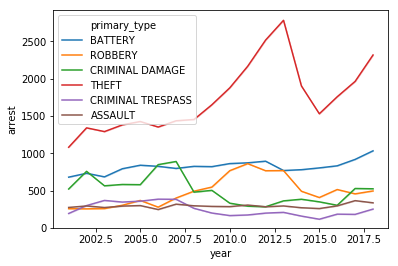

In [49]:
relevant_crimes = [
    "THEFT",
    "BATTERY",
    "CRIMINAL DAMAGE",
    "ROBBERY",
    "ASSAULT",
    "CRIMINAL TRESPASS"]
sns.lineplot(data=
df.loc[df.primary_type.isin(relevant_crimes)],
             hue="primary_type",
             x="year",
             y="arrest",
             estimator=len
            )
plt.ylim(bottom=0)
plt.legend(loc="best")

In [50]:
thefts = df[df.primary_type == "THEFT"]

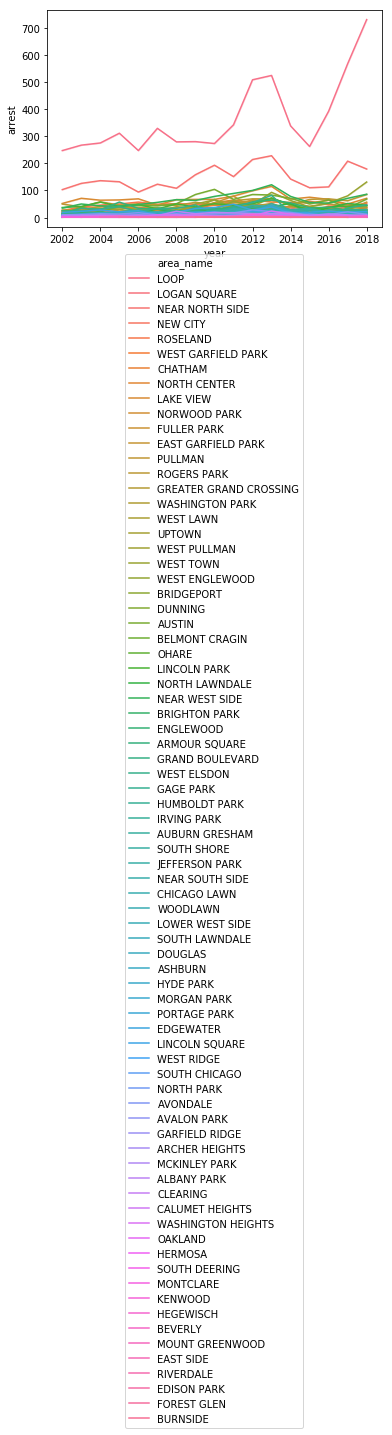

In [73]:
sns.lineplot(data=thefts_enriched, x="year", y="arrest", estimator=len, hue="area_name")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

In [67]:
community_areas = pd.read_csv("data/community_areas.csv", index_col=0)

In [72]:
thefts_enriched = thefts.merge(community_areas, how="left", left_on="community_area", right_index=True)

In [76]:
thefts_enriched.to_csv("data/thefts.csv")

In Excel, determined that crime on the L, when indexed to total ridership, is up by 50% from 2015 to 2017. Unfortunately, my L ridership dataset for 2018 is incomplete, but if we extrapolate previous trends, crime in 2018 was almost twice as bad as crime in 2015 and at the highest it's been for available data (which goes back to 2001).

This comes at a very problematic time for the CTA as ridership is also dropping, presumably due to the popularity of rideshare competitors.

What will be most interesting and helpful is:
* 1) be able to associate individual L stations with crimes if possible (may not be possible when crime took place on the train, although you could argue for splitting the responsibility for that crime 50-50 between the adjacent stations
* 2) be able to associate lines with crimes. That should be pretty easy if \#1 is possible, though this could work in other ways.
* 3) Be able to make statements like "this is the most dangerous station" or "this is the most dangerous line"
* 4) Be able to identify particularly dangerous times to travel (in terms of time of day).

In [80]:
sample = thefts.iloc[:5]

In [82]:
sample.latitude

4     41.885741
6     41.925115
7     41.904370
12    41.800863
19    41.716517
Name: latitude, dtype: float64

In [88]:
cta_stops = pd.read_csv("data/cta_stops.csv", index_col=0)

In [249]:
cta_stops[["Latitude", "Longitude"]] = cta_stops.Location.apply(lambda r: pd.Series(r.strip("()").split(",")))

In [126]:
cta_locs = cta_stops.Location.drop_duplicates().str.strip("()").str.split(", ")
cta_locs.head()

STOP_ID
30161    [41.857908, -87.669147]
30022    [41.829353, -87.680622]
30213    [41.831677, -87.625826]
30245    [41.816462, -87.619021]
30210    [41.809209, -87.618826]
Name: Location, dtype: object

In [127]:
cta_locs = pd.DataFrame(cta_locs)
cta_locs.columns

Index(['Location'], dtype='object')

In [128]:
cta_locs["Latitude"] = cta_locs.Location.map(lambda x: x[0])
cta_locs["Longitude"] = cta_locs.Location.map(lambda x: x[1])
cta_locs.head()

Location   Latitude   Longitude
STOP_ID                                                
30161    [41.857908, -87.669147]  41.857908  -87.669147
30022    [41.829353, -87.680622]  41.829353  -87.680622
30213    [41.831677, -87.625826]  41.831677  -87.625826
30245    [41.816462, -87.619021]  41.816462  -87.619021
30210    [41.809209, -87.618826]  41.809209  -87.618826

In [129]:
cta_locs[["Latitude", "Longitude"]].shape

(144, 2)

In [142]:
from scipy.spatial.distance import cdist

def closest_node(node, nodes):
    return nodes.iloc[cdist([node], nodes[["Latitude", "Longitude"]]).argmin()].name

In [110]:
import numpy as np

In [130]:
np.array([[41, -87]]).shape

(1, 2)

In [138]:
closest_node(np.array([41, -87]), cta_locs)

Location     [41.722377, -87.624342]
Latitude                   41.722377
Longitude                 -87.624342
Name: 30089, dtype: object

In [144]:
sample['closest_station'] = sample[["latitude", "longitude"]].apply(lambda r: closest_node(r, cta_locs), axis=1)

/Users/danielturcza/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [145]:
sample

arrest  beat                block case_number  community_area  \
4    False   122      001XX W LAKE ST    HZ130075            32.0   
6    False  1413  024XX N KIMBALL AVE    HZ130380            22.0   
7    False  1821     012XX N CLARK ST    HZ132929             8.0   
12   False   932  051XX S ASHLAND AVE    HY190243            61.0   
19   False   511     098XX S STATE ST    HY191707            49.0   

                   date      description  district  domestic fbi_code  \
4   2016-01-26T20:30:00   POCKET-PICKING         1     False       06   
6   2016-01-26T22:00:00   POCKET-PICKING        14     False       06   
7   2016-01-26T17:15:00   POCKET-PICKING        18     False       06   
12  2015-03-18T16:30:00  PURSE-SNATCHING         9     False       06   
19  2015-03-16T06:00:00   $500 AND UNDER         5     False       06   

         ...                                                  location  \
4        ...         {'latitude': '41.885741029', 'human_address': ...   
6        ...         {'latitude': '41.925114665', 'human_address': ...   
7        ...         {'latitude': '41.904370109', 'human_address': ...   
12       ...         {'latitude': '41.800863342', 'human_address': ...   
19       ...         {'latitude': '41.716517432', 'human_address': ...   

           location_description  longitude primary_type           updated_on  \
4                     CTA TRAIN -87.631712        THEFT  2018-02-10T15:50:01   
6                       CTA BUS -87.712120        THEFT  2018-02-10T15:50:01   
7                     CTA TRAIN -87.631460        THEFT  2018-02-10T15:50:01   
12                      CTA BUS -87.664766        THEFT  2018-02-10T15:50:01   
19  CTA GARAGE / OTHER PROPERTY -87.622732        THEFT  2018-02-10T15:50:01   

    ward x_coordinate y_coordinate  year  closest_station  
4   42.0    1175301.0    1901735.0  2016            30074  
6   26.0    1153302.0    1915914.0  2016            30197  
7   42.0    1175314.0    1908524.0  2016            30122  
12  16.0    1166541.0    1870734.0  2015            30061  
19  21.0    1178256.0    1840091.0  2015            30089  

[5 rows x 23 columns]

In [152]:
thefts["closest_station"] = thefts[["latitude", "longitude"]].apply(lambda r: closest_node(r, cta_locs), axis=1)

/Users/danielturcza/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [155]:
cta_stops

DIRECTION_ID                                     STOP_NAME  \
STOP_ID                                                              
30161              E                             18th (Loop-bound)   
30162              W                      18th (54th/Cermak-bound)   
30022              N                      35th/Archer (Loop-bound)   
30023              S                    35th/Archer (Midway-bound)   
30213              N             35-Bronzeville-IIT (Harlem-bound)   
30214              S               35-Bronzeville-IIT (63rd-bound)   
30245              N                           43rd (Harlem-bound)   
30246              S                             43rd (63rd-bound)   
30210              S                             47th (63rd-bound)   
30237              N                           47th (Howard-bound)   
30209              N                           47th (Harlem-bound)   
30238              S                             47th (95th-bound)   
30024              N                           51st (Harlem-bound)   
30025              S                             51st (63rd-bound)   
30113              E                      54th/Cermak (Loop-bound)   
30114              W                54th/Cermak (Terminal arrival)   
30177              N                           63rd (Howard-bound)   
30178              S                             63rd (95th-bound)   
30191              N                           69th (Howard-bound)   
30192              S                             69th (95th-bound)   
30046              N                           79th (Howard-bound)   
30047              S                             79th (95th-bound)   
30275              N                           87th (Howard-bound)   
30276              S                             87th (95th-bound)   
30089              S                    95th/Dan Ryan (95th-bound)   
30088              N                  95th/Dan Ryan (Howard-bound)   
30132              S                     Adams/Wabash (Inner Loop)   
30131              N                     Adams/Wabash (Outer Loop)   
30240              S                     Addison (Forest Pk-bound)   
30277              N                       Addison (Kimball-bound)   
...              ...                                           ...   
30037              S                         Sox-35th (95th-bound)   
30051              W                       State/Lake (Outer Loop)   
30050              E                       State/Lake (Inner Loop)   
30170              S                        Thorndale (95th-bound)   
30169              N                      Thorndale (Howard-bound)   
30069              W                 UIC-Halsted (Forest Pk-bound)   
30068              E                    UIC-Halsted (O'Hare-bound)   
30073              S                  Washington (Forest Pk-bound)   
30072              N                     Washington (O'Hare-bound)   
30383              N                Washington/Wabash (Outer Loop)   
30384              S                Washington/Wabash (Inner Loop)   
30141              N                 Washington/Wells (Inner Loop)   
30142              S                 Washington/Wells (Outer Loop)   
30231              N             Wellington (Kimball-Linden-bound)   
30232              S                       Wellington (Loop-bound)   
30129              N        Western (O'Hare Branch) (O'Hare-bound)   
30284              S                          Western (Loop-bound)   
30283              N                       Western (Kimball-bound)   
30143              E                          Western (Loop-bound)   
30144              W                   Western (54th/Cermak-bound)   
30061              S                        Western (Midway-bound)   
30060              N                          Western (Loop-bound)   
30130              S     Western (O'Hare Branch) (Forest Pk-bound)   
30042              E     Western (Forest Pk Branch) (O'Hare-bound)   
30043             

In [159]:
print(thefts[["closest_station"]].merge.__doc__)


Merge DataFrame objects by performing a database-style join operation by
columns or indexes.

If joining columns on columns, the DataFrame indexes *will be
ignored*. Otherwise if joining indexes on indexes or indexes on a column or
columns, the index will be passed on.

Parameters
----------
right : DataFrame
how : {'left', 'right', 'outer', 'inner'}, default 'inner'
    * left: use only keys from left frame, similar to a SQL left outer join;
      preserve key order
    * right: use only keys from right frame, similar to a SQL right outer join;
      preserve key order
    * outer: use union of keys from both frames, similar to a SQL full outer
      join; sort keys lexicographically
    * inner: use intersection of keys from both frames, similar to a SQL inner
      join; preserve the order of the left keys
on : label or list
    Field names to join on. Must be found in both DataFrames. If on is
    None and not merging on indexes, then it merges on the intersection of
    the colum

In [160]:
enriched = thefts.merge(cta_stops, how="left", left_on="closest_station", right_index=True)

In [161]:
enriched

arrest  beat                         block case_number  \
4        False   122               001XX W LAKE ST    HZ130075   
6        False  1413           024XX N KIMBALL AVE    HZ130380   
7        False  1821              012XX N CLARK ST    HZ132929   
12       False   932           051XX S ASHLAND AVE    HY190243   
19       False   511              098XX S STATE ST    HY191707   
22       False   112         0000X W WASHINGTON ST    HY192108   
25       False  1114               040XX W LAKE ST    HY192336   
28       False   623               0000X W 79TH ST    HY192777   
29       False  1931         020XX W DIVERSEY PKWY    HY192778   
38       False  1924           009XX W BELMONT AVE    HY193011   
40        True   113           002XX S DEARBORN ST    HY194531   
44       False  1612         065XX W BRYN MAWR AVE    HY195600   
46       False   122          003XX W JACKSON BLVD    HY195719   
50       False   925               003XX W 47TH ST    HY196243   
55       False  1133         034XX W CONGRESS PKWY    HY196871   
59       False  1824           0000X W DIVISION ST    HY197573   
62       False   512  103XX S STONY ISLAND EXT AVE    HY197560   
63       False  1925              032XX N BROADWAY    HY197222   
73       False  2422            075XX N PAULINA ST    HY199392   
88        True   322        0000X W CTA 69TH ST LN    HY201237   
91       False   232         059XX S LAFAYETTE AVE    HY201588   
97       False   813           059XX S KILDARE AVE    HY202402   
105      False   122              002XX N CLARK ST    HY203283   
109      False   631             081XX S ELLIS AVE    HY203636   
111      False  1914          011XX W LAWRENCE AVE    HY204095   
113       True   524            119XX S HALSTED ST    HY204257   
116      False   935         004XX W GARFIELD BLVD    HY204637   
117      False  1424             015XX N DAMEN AVE    HY204907   
119      False   623              079XX S STATE ST    HY204888   
131      False  1212           020XX W CHICAGO AVE    HY206830   
...        ...   ...                           ...         ...   
102442   False   113           003XX S DEARBORN ST    JB550238   
102447   False  1533            007XX S CICERO AVE    JB550629   
102449   False   123              011XX S STATE ST    JB550369   
102452   False  1122               036XX W LAKE ST    JB551110   
102453   False   112           0000X N DEARBORN ST    JB551500   
102454   False  1812          009XX W ARMITAGE AVE    JB551647   
102455   False   123              011XX S STATE ST    JB558461   
102458   False  2023         011XX W BRYN MAWR AVE    JB552152   
102462   False  1111            006XX N PULASKI RD    JB552518   
102463   False  2422            075XX N PAULINA ST    JB552885   
102464   False   113            002XX S WABASH AVE    JB552086   
102466   False   112              0000X S STATE ST    JB554303   
102467   False   122               001XX W LAKE ST    JB556623   
102468   False   113              002XX S State St    JB559905   
102473   False   915               001XX W 35TH ST    JB552906   
102474   False  1014            020XX S PULASKI RD    JB553053   
102476   False   111           001XX N DEARBORN ST    JB553550   
102477   False  1812         009XX W FULLERTON AVE    JB553508   
102478   False  1012           020XX S KOSTNER AVE    JB553399   
102480   False  1424         012XX N MILWAUKEE AVE    JB553490   
102481   False   122               001XX W LAKE ST    JB553546   
102483   False   113           003XX S DEARBORN ST    JB553437   
102487   False  1614        058XX N CUMBERLAND AVE    JB553727   
102488   False  1215           003XX N ASHLAND AVE    JB553885   
102489   False   122         001XX W CONGRESS PKWY    JB554280   
102490   False   123              006XX S STATE ST    JB556173   
102491   False   122              002XX N CLARK ST    JB559627   
102492   False  1623            055XX W WILSON AVE    JB561485   
102500   False   112              0000X N STATE 

In [168]:
len(enriched[enriched.O])

4009

In [169]:
enriched.rename({"G": "GREEN", "BRN": "BROWN", "P": "PURPLE", "Y": "YELLOW", "Pnk": "PINK", "O": "ORANGE"}, axis="columns", inplace=True)
colors = ['RED', 'BLUE', 'GREEN','BROWN', 'PURPLE', 'YELLOW', 'PINK', 'ORANGE']

In [170]:
print(enriched.melt.__doc__)


"Unpivots" a DataFrame from wide format to long format, optionally
leaving identifier variables set.

This function is useful to massage a DataFrame into a format where one
or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to
the row axis, leaving just two non-identifier columns, 'variable' and
'value'.

.. versionadded:: 0.20.0

Parameters
----------
frame : DataFrame
id_vars : tuple, list, or ndarray, optional
    Column(s) to use as identifier variables.
value_vars : tuple, list, or ndarray, optional
    Column(s) to unpivot. If not specified, uses all columns that
    are not set as `id_vars`.
var_name : scalar
    Name to use for the 'variable' column. If None it uses
    ``frame.columns.name`` or 'variable'.
value_name : scalar, default 'value'
    Name to use for the 'value' column.
col_level : int or string, optional
    If columns are a MultiIndex then use this level to melt.

See also


In [177]:
enriched["crimes_count"] = 1

In [208]:
tidy = enriched.melt(id_vars=["crimes_count", "STATION_NAME", "year"], value_vars=colors)

In [209]:
tidy = tidy[tidy.value]

In [218]:
tidy.columns

Index(['crimes_count', 'STATION_NAME', 'year', 'variable', 'value'], dtype='object')

In [227]:
tidy.groupby(["STATION_NAME", "year", "variable"]).sum()['crimes_count'].to_csv("data/crimes_by_station.csv")

In [202]:
agg = tidy.groupby(["year", "variable"])['crimes_count'].sum().unstack().fillna(0)

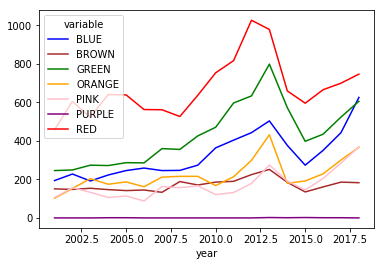

In [203]:
agg.plot(kind="line", legend="right", color=agg.columns)

This is starting to come together, which is pretty fun. Initial insights:

1. The green, orange, and pink lines all appear to be more dangerous than the other lines. No data is available for purple or yellow - it seems that maybe the police do not even categorize crimes on the Yellow line as CTA crimes? And purple fully overlaps with another line (this is something we could do better as we get more rigorous). The brown line is the safest line. Red and blue are pretty comparable.
2. Interestingly, most crime increase in the last several years has been driven by increases in the Loop. Theft incidents at clark/lake have nearly quadrupled over the last 3 years. Thefts at the Washington blue line stop went from 17 in 2015 to 99 in 2018 - literally a 10x increase. At an aggregate level, total crimes from 2018 compared to 2015 increased by 466 in the loop and 404 in all others combined. That's still a 50% increase for all other areas - not good - but a 200% increase for the loop. Looking 2a. Looking into it more closely, it seems like the increase is largely pocket-picking and $500 and under, though those are the most common offenses anyway.

What should happen to make this more legitimate?

- for a given unit of reporting time, we want to be able associate both the number of crimes that occurred and the ridership. The most granular level available for both types is the day. Probably also want to be able to split by crime types as well. This is basically like $pp from ERS - we have a lot of dollars, and then need to be dividing by the appropriate denominator.
- ensure we're filtering out the bus crimes
- we can analyze time of day and other crime factors separately. Unfortunately, I don't think there's a good way to incorporate ridership at that level of granularity.
- as already noted, there's no reason to limit to just thefts here
- how do we decide how to split ridership? how to split crime?
- for crimes that occurred on the train, we might want to investigate how they're listed. Do they appear to be at a station? or can they occur in between? Depending on what these look like, we might want a more nuanced treatment.
- put more of this data on a map. Clusters per station seem like a natural approach.
- enrich with human-readable for the following fields: beat, community_area, district, fbi_code, iucr, ward

What are the limitations?

- some crimes may have inaccurate locations that cause them to be associated with the wrong line. This may be especially problematic in dense areas like the loop.
- lines are not purely separable, both because of data issues (if it happened between Fullerton and Belmont stations, it is equally possible that it is Brown line or Red line), and because the lines actually share platforms. I think this is just a limitation we will have to treat with accounting.
- there may be general data quality issues. The CTA dataset shows some odd ridership patterns in some years (e.g. complementary increase/decrease in traffic for the red/green lines a few years ago). The crime dataset mentions in the Location field that some rows may need "recoding", whatever that means.
- the CTA ridership data just shows entries at that station. It has no bearing on how trafficked that station was at the time of the crime, for instance. It doesn't account for transfers, which means some lines might have less traffic than in reality. Unfortunately, this is just a limitation of the data.

What is actually going to be actionable about this?

- increased emphasis on pocket-picking in the loop
- more resources to more problematic lines
- the dream would be something that highlights particular areas and times of day where more support is needed. Maybe this is something that needs to be paired with data on who is on what patrol?
- look at other crime prevention techniques on subways/platforms, etc.

Other questions
- do thefts clusters? can you identify repeat offenders or "territory"?